In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Input,MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD,Nadam,AdamW,RMSprop


import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import cifar10
import numpy as np

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

def prepare_ship_data(x, y):
    ship_idx = np.where(y == 8)[0]
    non_ship_idx = np.where(y != 8)[0]
    n = min(len(ship_idx), len(non_ship_idx))
    idx = np.concatenate([ship_idx[:n], np.random.choice(non_ship_idx, n, replace=False)])
    np.random.shuffle(idx)
    return x[idx].astype('float32') / 255.0, (y[idx] == 8).astype(int)

x_train_ship, y_train_ship = prepare_ship_data(x_train, y_train)
x_test_ship, y_test_ship = prepare_ship_data(x_test, y_test)


In [3]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
L2_REG = 1e-4

model = Sequential()
# model.add(Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=INPUT_SHAPE, kernel_regularizer=l2(L2_REG)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
# model.add(BatchNormalization())
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
# model.add(BatchNormalization())
# model.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(8, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
# model.add(BatchNormalization())
# model.add(Conv2D(8, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(GlobalAveragePooling2D())
# model.add(Dense(16, activation='relu', kernel_regularizer=l2(L2_REG)))
# model.add(Dropout(0.3))
# model.add(Dense(8, activation='relu', kernel_regularizer=l2(L2_REG)))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(L2_REG)))
# Edge Detection Block - Important for ship contours
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=INPUT_SHAPE, kernel_regularizer=l2(L2_REG)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Texture Analysis Block - For water/wave patterns
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Shape Detection Block - For ship silhouettes
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Context Integration Block - For understanding ship environment
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(L2_REG)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Classification Layers
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(L2_REG)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(L2_REG)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(L2_REG)))




METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss=BinaryCrossentropy(), optimizer='adam', metrics=METRICS)

C:\Users\Laptop\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:

def apply_cutout(image, size=8, n_holes=1):
    h, w = image.shape[0], image.shape[1]
    for n in range(n_holes):
        y = np.random.randint(h)
        x = np.random.randint(w)

        
        y1 = np.clip(y - size // 2, 0, h)
        y2 = np.clip(y + size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        x2 = np.clip(x + size // 2, 0, w)

        
        image[y1:y2, x1:x2, :] = 0
    return image


x_train_ship_cutout = x_train_ship.copy()
for i in range(len(x_train_ship_cutout)):
    x_train_ship_cutout[i] = apply_cutout(x_train_ship_cutout[i])


In [5]:


datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)
datagen.fit( x_train_ship_cutout)
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 20:
        lr *= 0.5e-3
    elif epoch > 15:
        lr *= 1e-3
    elif epoch > 10:
        lr *= 1e-2
    elif epoch > 5:
        lr *= 1e-1
    return lr

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]


print("Training on ship vs non-ship images...")
history_ship = model.fit(
    datagen.flow( x_train_ship_cutout, y_train_ship, batch_size=8),
    epochs=20,
    validation_data=(x_test_ship, y_test_ship),
    callbacks=callbacks,
    steps_per_epoch=len( x_train_ship_cutout) // 8,
    verbose=1
)


model.save('ship_non_ship_cnn_model.keras')


Training on ship vs non-ship images...
Epoch 1/20


C:\Users\Laptop\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.7159 - loss: 0.6336 - precision: 0.6996 - recall: 0.7634 - val_accuracy: 0.8200 - val_loss: 0.4563 - val_precision: 0.8213 - val_recall: 0.8180 - learning_rate: 0.0010
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.7775 - loss: 0.5531 - precision: 0.7608 - recall: 0.8073 - val_accuracy: 0.7395 - val_loss: 0.7802 - val_precision: 0.6613 - val_recall: 0.9820 - learning_rate: 0.0010
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.7822 - loss: 0.5296 - precision: 0.7626 - recall: 0.8121 - val_accuracy: 0.8285 - val_loss: 0.4496 - val_precision: 0.7905 - val_recall: 0.8940 - learning_rate: 0.0010
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 42ms/step - accuracy: 0.7936 - loss: 0.5176 - precision: 0.7688 - recall: 0.8327 - val_accuracy: 0.7840 - val_loss: 0.5043 - val_precision: 0.7243 - val_recall: 0.9170 - learning_rate: 0.0010
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - a

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


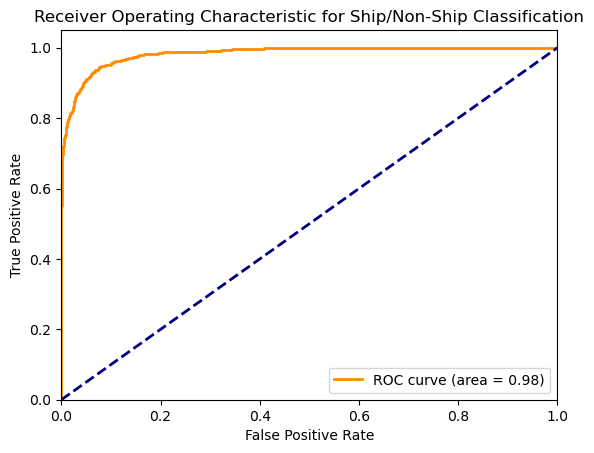

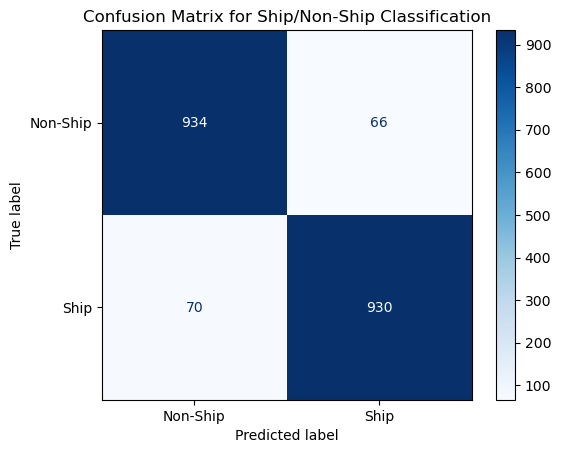

In [6]:

y_pred_prob = model.predict(x_test_ship).ravel()
y_pred_class = (y_pred_prob > 0.56).astype(int)

fpr, tpr, thresholds = roc_curve(y_test_ship, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Ship/Non-Ship Classification')
plt.legend(loc="lower right")
plt.show()


cm = confusion_matrix(y_test_ship, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Ship', 'Ship'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ship/Non-Ship Classification')
plt.show()

In [7]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


def prepare_binary_data(x, y, target_class):
    pos_idx = np.where(y == target_class)[0]
    neg_idx = np.where((y != target_class))[0]
    n = min(len(pos_idx), len(neg_idx))
    idx = np.concatenate([pos_idx[:n], np.random.choice(neg_idx, n, replace=False)])
    np.random.shuffle(idx)
    return x[idx].astype('float32') / 255.0, (y[idx] == target_class).astype(int)

x_train_auto, y_train_auto = prepare_binary_data(x_train, y_train, target_class=1)
x_test_auto, y_test_auto = prepare_binary_data(x_test, y_test, target_class=1)



In [8]:
model = tf.keras.models.load_model('ship_non_ship_cnn_model.keras')


for layer in model.layers:
    layer.trainable = False


last_conv2d = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv2d = layer
        break

gap_layer = None
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.GlobalAveragePooling2D):
        gap_layer = layer
        break

if last_conv2d is not None:
    last_conv2d.trainable = True
if gap_layer is not None:
    gap_layer.trainable = True

model.compile(optimizer=Adam(3.37e-3), loss='binary_crossentropy', metrics=['accuracy'])#

In [9]:



def apply_cutout(image, size=8, n_holes=1):
    h, w = image.shape[0], image.shape[1]
    for n in range(n_holes):
     
        y = np.random.randint(h)
        x = np.random.randint(w)

        y1 = np.clip(y - size // 2, 0, h)
        y2 = np.clip(y + size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        x2 = np.clip(x + size // 2, 0, w)


        image[y1:y2, x1:x2, :] = 0
    return image
def cutout_preprocess(img):
    return apply_cutout(img)
x_train_auto_cutout = x_train_auto.copy()
for i in range(len(x_train_auto_cutout)):
    x_train_auto_cutout[i] = apply_cutout(x_train_auto_cutout[i])

datagen = ImageDataGenerator(
    preprocessing_function=cutout_preprocess,
    rotation_range=6,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train_auto_cutout)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

print("Fine-tuning ship model on automobile vs non-automobile images...")
history_auto = model.fit(
    datagen.flow(x_train_auto_cutout, y_train_auto, batch_size=8),
    epochs=20,
    validation_data=(x_test_auto, y_test_auto),
    callbacks=callbacks,
    steps_per_epoch=len(x_train_auto_cutout) // 8,
    verbose=1
)

model.save('auto_non_auto_cnn_model_from_ship.keras')


Fine-tuning ship model on automobile vs non-automobile images...
Epoch 1/20


C:\Users\Laptop\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.7061 - loss: 0.5935 - val_accuracy: 0.7630 - val_loss: 0.4950 - learning_rate: 0.0034
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.7652 - loss: 0.5179 - val_accuracy: 0.7830 - val_loss: 0.4835 - learning_rate: 0.0034
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3298s 3s/step - accuracy: 0.7559 - loss: 0.5295 - val_accuracy: 0.7985 - val_loss: 0.4651 - learning_rate: 0.0034
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7541 - loss: 0.5290 - val_accuracy: 0.8005 - val_loss: 0.4599 - learning_rate: 0.0034
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7523 - loss: 0.5398 - val_accuracy: 0.7815 - val_loss: 0.5016 - learning_rate: 0.0034
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7666 - loss: 0.5198 - val_accuracy: 0.7880 - val_loss: 0.4756 - learning_rate: 0.0034
Epoch 7/20
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7668 -

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


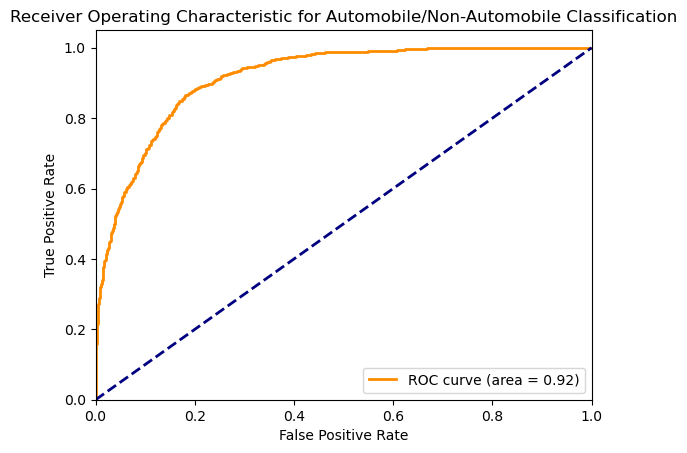

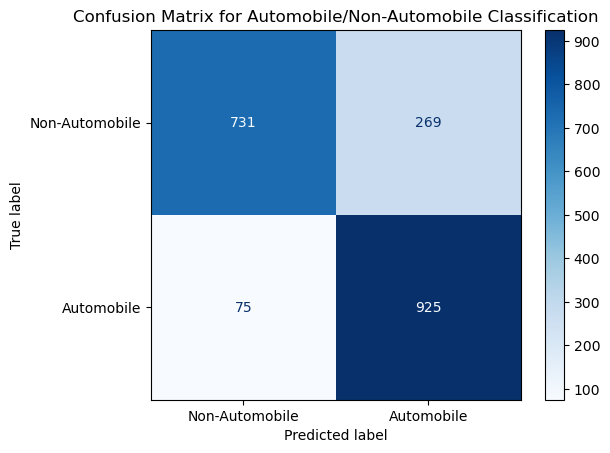

In [10]:

import matplotlib.pyplot as plt
y_pred_prob_auto = model.predict(x_test_auto).ravel()
y_pred_class_auto = (y_pred_prob_auto > 0.56).astype(int)

fpr_auto, tpr_auto, thresholds_auto = roc_curve(y_test_auto, y_pred_prob_auto)
roc_auc_auto = auc(fpr_auto, tpr_auto)

plt.figure()
plt.plot(fpr_auto, tpr_auto, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_auto)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Automobile/Non-Automobile Classification')
plt.legend(loc="lower right")
plt.show()

cm_auto = confusion_matrix(y_test_auto, y_pred_class_auto)
disp_auto = ConfusionMatrixDisplay(confusion_matrix=cm_auto, display_labels=['Non-Automobile', 'Automobile'])
disp_auto.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Automobile/Non-Automobile Classification')
plt.show()

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

def prepare_binary_data(x, y, target_class):
    pos_idx = np.where(y == target_class)[0]
    neg_idx = np.where((y != target_class))[0]
    n = min(len(pos_idx), len(neg_idx))
    idx = np.concatenate([pos_idx[:n], np.random.choice(neg_idx, n, replace=False)])
    np.random.shuffle(idx)
    return x[idx].astype('float32') / 255.0, (y[idx] == target_class).astype(int)

x_train_truck, y_train_truck = prepare_binary_data(x_train, y_train, target_class=9)
x_test_truck, y_test_truck = prepare_binary_data(x_test, y_test, target_class=9)


In [12]:
model = tf.keras.models.load_model('ship_non_ship_cnn_model.keras')

def apply_random_cutout(image, size_range=(4, 5), holes_range=(1, 4)):
    h, w = image.shape[:2]
    img = image.copy()
    size = np.random.randint(size_range[0], size_range[1]+1)
    holes = np.random.randint(holes_range[0], holes_range[1]+1)
    for _ in range(holes):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size//2, 0, h)
        y2 = np.clip(y + size//2, 0, h)
        x1 = np.clip(x - size//2, 0, w)
        x2 = np.clip(x + size//2, 0, w)
        img[y1:y2, x1:x2, :] = 0
    return img

model = tf.keras.models.load_model('ship_non_ship_cnn_model.keras')


for layer in model.layers:
    layer.trainable = False

last_conv2d = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv2d = layer
        break


gap_layer = None
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.GlobalAveragePooling2D):
        gap_layer = layer
        break

if last_conv2d is not None:
    last_conv2d.trainable = True
if gap_layer is not None:
    gap_layer.trainable = True

model.compile(optimizer=AdamW(2.37e-3), loss='binary_crossentropy', metrics=['accuracy'])#


datagen = ImageDataGenerator(

    rotation_range=12,
    width_shift_range=0.10,
    height_shift_range=0.14,
    zoom_range=0.12,
    shear_range=0.2,
    horizontal_flip=True,
    preprocessing_function=apply_random_cutout

)
datagen.fit(x_train_truck)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, verbose=1)
]

print("Fine-tuning ship model on truck vs non-truck images...")
history_truck = model.fit(
    datagen.flow(x_train_truck, y_train_truck, batch_size=8),
    epochs=20,
    validation_data=(x_test_truck, y_test_truck),
    callbacks=callbacks,
    steps_per_epoch=len(x_train_truck) // 8,
    verbose=1
)

model.save('truck_non_truck_cnn_model.keras')



Fine-tuning ship model on truck vs non-truck images...
Epoch 1/20


C:\Users\Laptop\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.7002 - loss: 0.5938 - val_accuracy: 0.7845 - val_loss: 0.4855 - learning_rate: 0.0024
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7587 - loss: 0.5221 - val_accuracy: 0.7885 - val_loss: 0.4764 - learning_rate: 0.0024
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.7616 - loss: 0.5185 - val_accuracy: 0.7885 - val_loss: 0.4758 - learning_rate: 0.0024
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7569 - loss: 0.5143 - val_accuracy: 0.7970 - val_loss: 0.4585 - learning_rate: 0.0024
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7708 - loss: 0.5025 - val_accuracy: 0.7290 - val_loss: 0.5289 - learning_rate: 0.0024
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7690 - loss: 0.5070 - val_accuracy: 0.7930 - val_loss: 0.4652 - learning_rate: 0.0024
Epoch 7/20
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7723 -

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


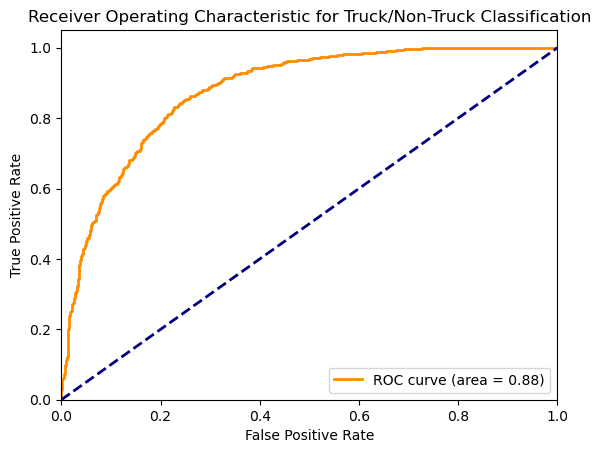

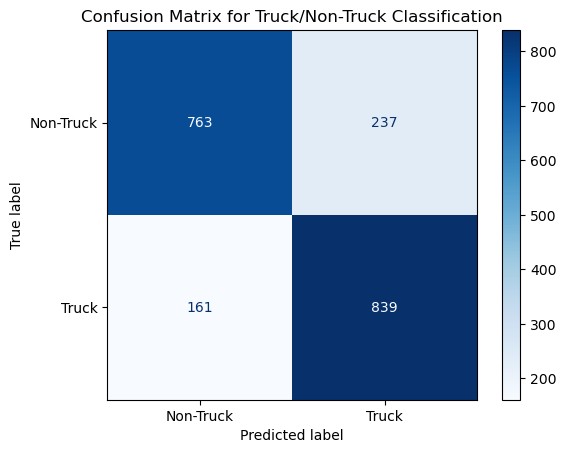

In [13]:

import matplotlib.pyplot as plt
y_pred_prob_truck = model.predict(x_test_truck).ravel()
y_pred_class_truck = (y_pred_prob_truck > 0.56).astype(int)

fpr_truck, tpr_truck, thresholds_truck = roc_curve(y_test_truck, y_pred_prob_truck)
roc_auc_truck = auc(fpr_truck, tpr_truck)

plt.figure()
plt.plot(fpr_truck, tpr_truck, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_truck)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Truck/Non-Truck Classification')
plt.legend(loc="lower right")
plt.show()

cm_truck = confusion_matrix(y_test_truck, y_pred_class_truck)
disp_truck = ConfusionMatrixDisplay(confusion_matrix=cm_truck, display_labels=['Non-Truck', 'Truck'])
disp_truck.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Truck/Non-Truck Classification')
plt.show()

In [14]:
model = tf.keras.models.load_model('ship_non_ship_cnn_model.keras')


for layer in model.layers:
    layer.trainable = False


last_conv2d = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv2d = layer
        break


gap_layer = None
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.GlobalAveragePooling2D):
        gap_layer = layer
        break

if last_conv2d is not None:
    last_conv2d.trainable = True
if gap_layer is not None:
    gap_layer.trainable = True


model.compile(optimizer=Adam(learning_rate=5.38e-3), loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
airplane_class = 0
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

def prepare_binary_dataset(x, y, target_class):
    target_indices = np.where(y == target_class)[0]
    other_indices = np.where(y != target_class)[0]
    np.random.shuffle(other_indices)
    other_indices = other_indices[:len(target_indices)]

    selected_indices = np.concatenate([target_indices, other_indices])
    np.random.shuffle(selected_indices)
    x_selected = x[selected_indices].astype('float32') / 255.0
    y_selected = np.where(y[selected_indices] == target_class, 1, 0)
    return x_selected, y_selected

x_train_airplane, y_train_airplane = prepare_binary_dataset(x_train, y_train, airplane_class)
x_test_airplane, y_test_airplane = prepare_binary_dataset(x_test, y_test, airplane_class)

In [16]:
def apply_random_cutout(image, size_range=(4, 5), holes_range=(1, 4)):
    h, w = image.shape[:2]
    img = image.copy()
    size = np.random.randint(size_range[0], size_range[1]+1)
    holes = np.random.randint(holes_range[0], holes_range[1]+1)
    for _ in range(holes):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size//2, 0, h)
        y2 = np.clip(y + size//2, 0, h)
        x1 = np.clip(x - size//2, 0, w)
        x2 = np.clip(x + size//2, 0, w)
        img[y1:y2, x1:x2, :] = 0
    return img
# def apply_cutout(image, size=8, n_holes=1):
#     h, w = image.shape[0], image.shape[1]
#     for n in range(n_holes):
#         # Random position of cutout
#         y = np.random.randint(h)
#         x = np.random.randint(w)

#         # Ensure cutout stays within image bounds
#         y1 = np.clip(y - size // 2, 0, h)
#         y2 = np.clip(y + size // 2, 0, h)
#         x1 = np.clip(x - size // 2, 0, w)
#         x2 = np.clip(x + size // 2, 0, w)

#         # Set the cutout region to zero
#         image[y1:y2, x1:x2, :] = 0
#     return image
# def cutout_preprocess(img):
#     return apply_cutout(img)

# Data augmentation for airplane
datagen_airplane = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.12,
    shear_range=0.15,
    horizontal_flip=True,
    preprocessing_function=apply_random_cutout
)
datagen_airplane.fit(x_train_airplane)

callbacks_airplane = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

print("Fine-tuning model on airplane and non-airplane images...")
history_airplane = model.fit(
    datagen_airplane.flow(x_train_airplane, y_train_airplane, batch_size=8),
    epochs=20,
    validation_data=(x_test_airplane, y_test_airplane),
    callbacks=callbacks_airplane,
    steps_per_epoch=len(x_train_airplane) // 8,
    verbose=1
)

model.save('airplane_non_airplane_cnn_model.keras')

Fine-tuning model on airplane and non-airplane images...
Epoch 1/20


C:\Users\Laptop\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.7611 - loss: 0.5314 - val_accuracy: 0.8225 - val_loss: 0.4325 - learning_rate: 0.0054
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7787 - loss: 0.5059 - val_accuracy: 0.8290 - val_loss: 0.4299 - learning_rate: 0.0054
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7761 - loss: 0.5111 - val_accuracy: 0.8240 - val_loss: 0.4393 - learning_rate: 0.0054
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7924 - loss: 0.4971 - val_accuracy: 0.8160 - val_loss: 0.4482 - learning_rate: 0.0054
Epoch 5/20
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7922 - loss: 0.4919
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.002689999993890524.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.7922 - loss: 0.4919 - val_accuracy: 0.8210 - val_loss: 0.4593 - learning_rate: 0.0054
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7943 - l

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


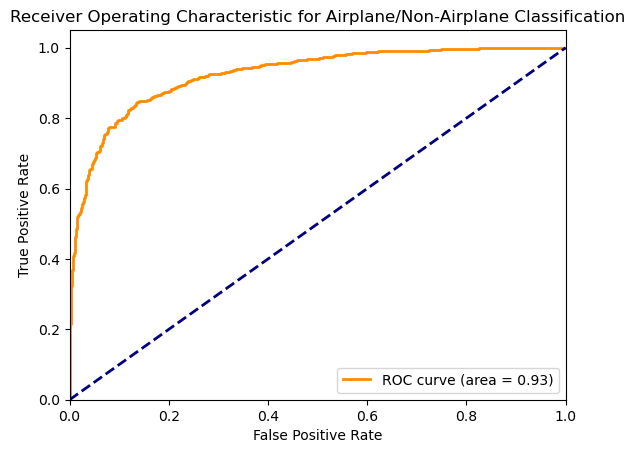

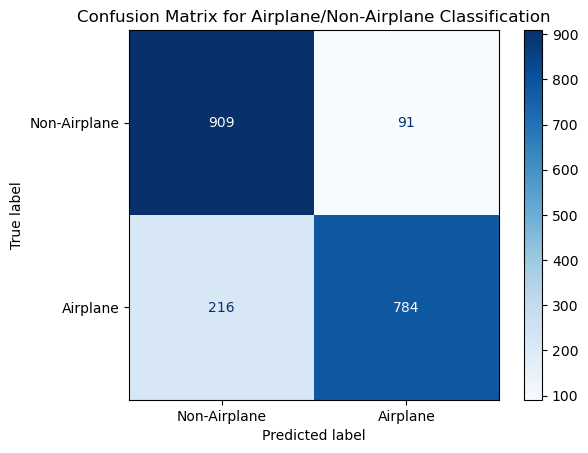

In [17]:

import matplotlib.pyplot as plt
y_pred_prob_airplane = model.predict(x_test_airplane).ravel()
y_pred_class_airplane = (y_pred_prob_airplane > 0.56).astype(int)

fpr_airplane, tpr_airplane, thresholds_airplane = roc_curve(y_test_airplane, y_pred_prob_airplane)
roc_auc_airplane = auc(fpr_airplane, tpr_airplane)

plt.figure()
plt.plot(fpr_airplane, tpr_airplane, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_airplane)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Airplane/Non-Airplane Classification')
plt.legend(loc="lower right")
plt.show()

cm_airplane = confusion_matrix(y_test_airplane, y_pred_class_airplane)
disp_airplane = ConfusionMatrixDisplay(confusion_matrix=cm_airplane, display_labels=['Non-Airplane', 'Airplane'])
disp_airplane.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Airplane/Non-Airplane Classification')
plt.show()

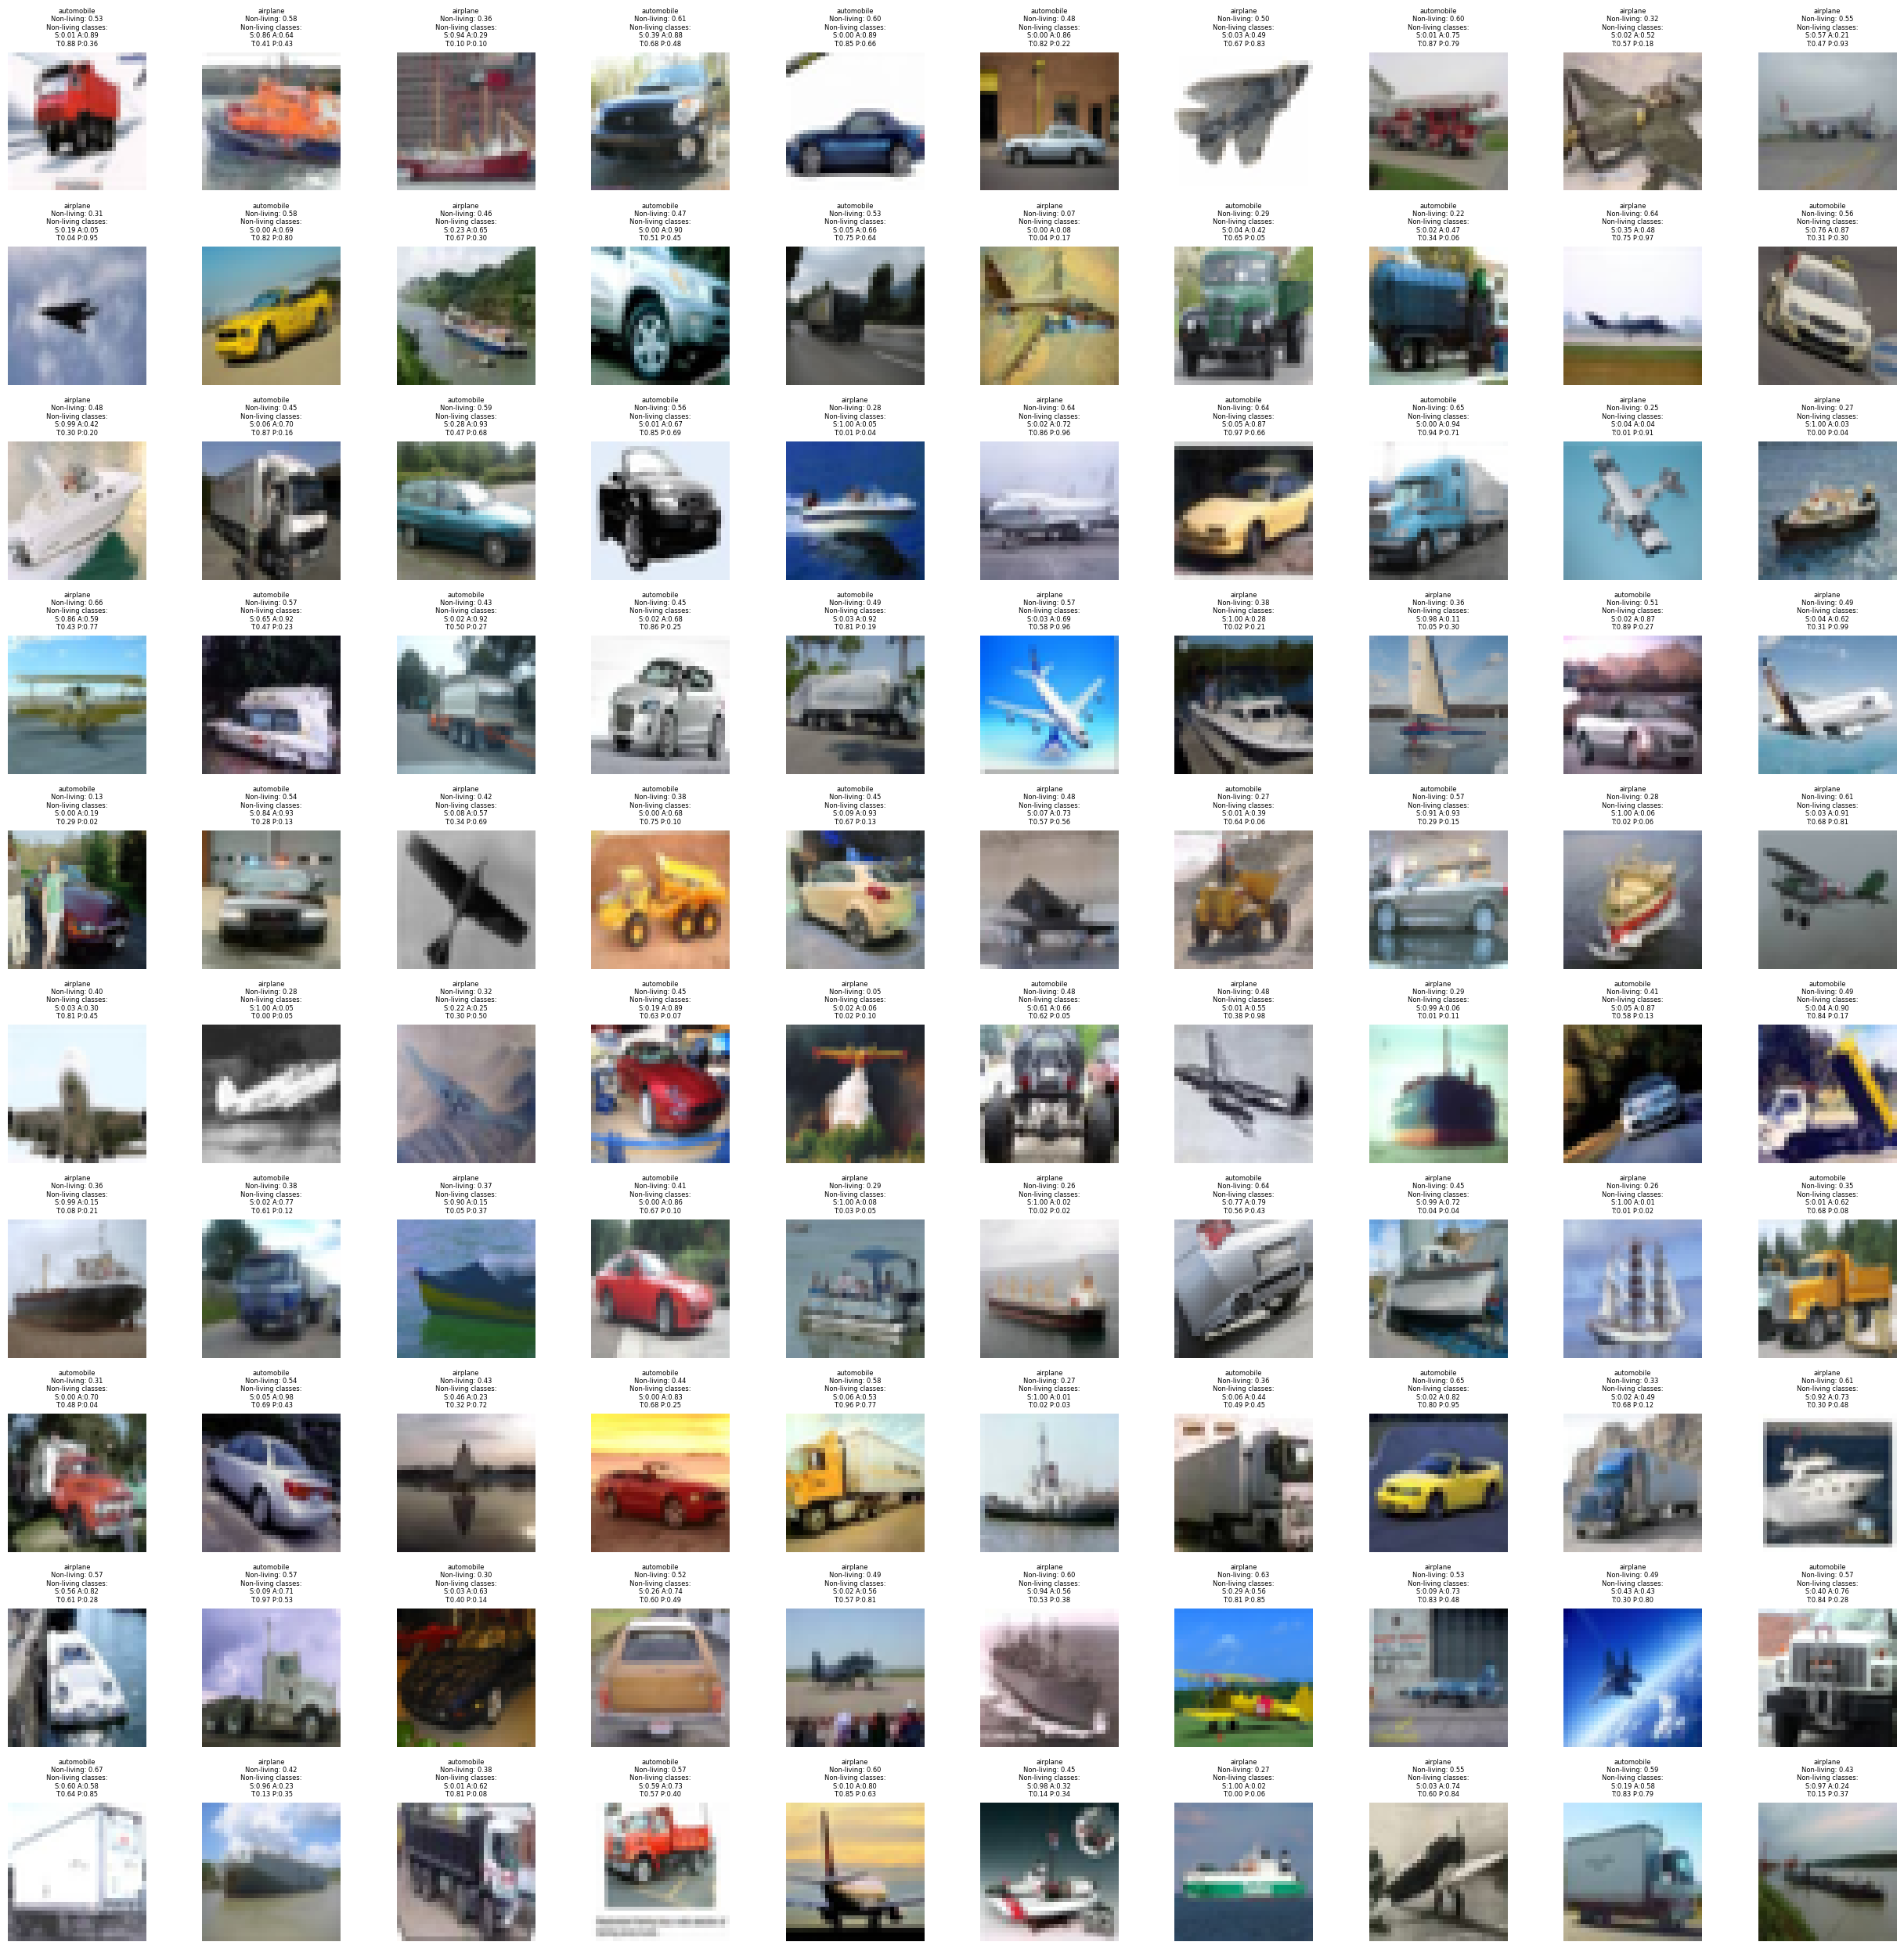

In [18]:

ship_model = tf.keras.models.load_model('ship_non_ship_cnn_model.keras')
auto_model = tf.keras.models.load_model('auto_non_auto_cnn_model_from_ship.keras')
truck_model = tf.keras.models.load_model('truck_non_truck_cnn_model.keras')
airplane_model = tf.keras.models.load_model('airplane_non_airplane_cnn_model.keras')

class_names = ['airplane', 'automobile', 'ship', 'truck']
non_living_classes = ['airplane', 'automobile', 'ship', 'truck']

# Token-based prediction function for non-living categories only
def predict_with_token(image, token):
    image = np.expand_dims(image, axis=0)
    if token == 1:  # Ship
        return ship_model.predict(image, verbose=0)[0][0]
    elif token == 2:  # Automobile
        return auto_model.predict(image, verbose=0)[0][0]
    elif token == 3:  # Truck
        return truck_model.predict(image, verbose=0)[0][0]
    elif token == 4:  # Airplane
        return airplane_model.predict(image, verbose=0)[0][0]
    else:
        raise ValueError("Invalid token. Use 1-4 for non-living categories")

# Load CIFAR-10 data and normalize
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype('float32') / 255.0
y_test = y_test.flatten()

# Filter for only non-living classes (indices 0,1,8,9)
non_living_indices = np.where(np.isin(y_test, [0,1,8,9]))[0]
selected_indices = []
for class_idx in [0,1,8,9]:  # airplane, automobile, ship, truck
    class_indices = np.where(y_test == class_idx)[0]
    selected_indices.extend(np.random.choice(class_indices, 25, replace=False))
selected_images = x_test[selected_indices]
selected_labels = y_test[selected_indices]

# Collect predictions
results = []
for i, (image, label) in enumerate(zip(selected_images, selected_labels)):
    # Non-living category predictions
    prob_ship = predict_with_token(image, 1)
    prob_auto = predict_with_token(image, 2)
    prob_truck = predict_with_token(image, 3)
    prob_airplane = predict_with_token(image, 4)

    # Calculate non-living probabilities
    non_living_prob = (prob_ship + prob_auto + prob_truck + prob_airplane) / 4

    true_class = class_names[label % 4]  # Map to our class_names indices

    results.append({
        'image_index': selected_indices[i],
        'true_label': true_class,
        'prob_ship': prob_ship,
        'prob_auto': prob_auto,
        'prob_truck': prob_truck,
        'prob_airplane': prob_airplane,
        'non_living_prob': non_living_prob,
        'true_ship': 1 if label == 8 else 0,
        'true_auto': 1 if label == 1 else 0,
        'true_truck': 1 if label == 9 else 0,
        'true_airplane': 1 if label == 0 else 0
    })

import pandas as pd
df = pd.DataFrame(results)

# Display 100 random images with their probabilities
np.random.seed(42)
sample_indices = np.random.choice(len(selected_images), 100, replace=False)

plt.figure(figsize=(25, 25))

for i, idx in enumerate(sample_indices):
    image = selected_images[idx]
    result = df.iloc[idx]

    plt.subplot(10, 10, i + 1)
    plt.imshow(image)
    plt.axis('off')

    title = f"{result['true_label']}\n"
    title += f"Non-living: {result['non_living_prob']:.2f}\n"
    title += f"Non-living classes:\n"
    title += f"S:{result['prob_ship']:.2f} A:{result['prob_auto']:.2f}\n"
    title += f"T:{result['prob_truck']:.2f} P:{result['prob_airplane']:.2f}"

    plt.title(title, fontsize=6)

plt.tight_layout()
plt.show()

In [19]:
# Analyze network complexity and parameters for each model and the overall classifier

import numpy as np

def print_model_complexity(model, model_name="Model"):
    print(f"\n{'='*60}")
    print(f"{model_name} Summary:")
    model.summary()
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
    non_trainable_params = np.sum([np.prod(v.shape) for v in model.non_trainable_weights])
    print(f"\n{model_name} total parameters: {total_params:,}")
    print(f"{model_name} trainable parameters: {trainable_params:,}")
    print(f"{model_name} non-trainable parameters: {non_trainable_params:,}")
    print(f"\n{model_name} Layer-wise details:")
    for i, layer in enumerate(model.layers):
        # Some layers may not have output_shape attribute
        output_shape = getattr(layer, "output_shape", "N/A")
        print(f"{i+1:2d}. {layer.name:30s} | Type: {layer.__class__.__name__:20s} | Output shape: {output_shape} | Params: {layer.count_params()}")
    print(f"{'='*60}\n")

# If you have multiple models, list them here with their names
# Example:
# models = [model1, model2, model3]
# model_names = ["Ship Classifier", "Auto Classifier", "Truck Classifier"]

# For demonstration, if you only have one model:
models = [model]
model_names = ["NonLivingClassifier"]

overall_total_params = 0
overall_trainable_params = 0
overall_non_trainable_params = 0

for m, name in zip(models, model_names):
    print_model_complexity(m, name)
    overall_total_params += m.count_params()
    overall_trainable_params += np.sum([np.prod(v.shape) for v in m.trainable_weights])
    overall_non_trainable_params += np.sum([np.prod(v.shape) for v in m.non_trainable_weights])

print(f"{'#'*60}")
print("Overall Network Complexity for the Entire Classifier:")
print(f"Total parameters (all models): {overall_total_params:,}")
print(f"Trainable parameters (all models): {overall_trainable_params:,}")
print(f"Non-trainable parameters (all models): {overall_non_trainable_params:,}")
print(f"{'#'*60}")



NonLivingClassifier Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 315,427 (1.20 MB)

 Trainable params: 36,928 (144.25 KB)

 Non-trainable params: 204,641 (799.38 KB)

 Optimizer params: 73,858 (288.51 KB)


NonLivingClassifier total parameters: 241,569
NonLivingClassifier trainable parameters: 36,928
NonLivingClassifier non-trainable parameters: 204,641

NonLivingClassifier Layer-wise details:
 1. conv2d                         | Type: Conv2D               | Output shape: N/A | Params: 2432
 2. batch_normalization            | Type: BatchNormalization   | Output shape: N/A | Params: 128
 3. conv2d_1                       | Type: Conv2D               | Output shape: N/A | Params: 9248
 4. batch_normalization_1          | Type: BatchNormalization   | Output shape: N/A | Params: 128
 5. max_pooling2d                  | Type: MaxPooling2D         | Output shape: N/A | Params: 0
 6. dropout                        | Type: Dropout              | Output shape: N/A | Params: 0
 7. conv2d_2                       | Type: Conv2D               | Output shape: N/A | Params: 18496
 8. batch_normalization_2          | Type: BatchNormalization   | Output shape: N/A | Params: 256
 9. conv2d_3             